In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [ ]:
def time_prop(X, P):
    

In [10]:


N = 20  # number of species
T = 1000  # Total number of time steps

A = np.random.rand(N, N)  # feeding attention matrix

# Normalize rows of A
row_sums = A.sum(axis=1)
A = A / row_sums[:, np.newaxis]
# Predator boolean matrix, will not predate something if False
Predators = np.random.rand(N, N) > 0.5
np.fill_diagonal(Predators, 0)  # no self predation
np.fill_diagonal(A, 0)

# print(f'A:\n{A}')
# print(f'Predators:\n{Predators}')

x = np.ones(N)  # initial population density

r = 0.1 * np.random.rand(N)  # random growth rates
s = 5.5  # self-limiting strength
p = np.zeros((N, T))  # Store population
e = np.random.rand(N, N) / np.sqrt(N)  # efficiency of predation

# Time loop
for t in range(T):
    # if t % (T//4) == 0:
    #     e = np.random.rand(N, N) / np.sqrt(N)  # mix things up

    growth = x * r
    comp_effect = -s * x * x
    pred_interaction = 10 * e * A * Predators @ x
    prey_inter = - A * Predators @ x

    x_2 = x + 0.1 * (growth + comp_effect + pred_interaction + prey_inter)
    x_2[x_2 < 0] = 0

    x = x + 0.1 * (x * r - s * x * x + 10 * e * A * Predators @ x - A * Predators @ x)
    x[x < 0] = 0

    # Update A based on prey abundance
    for i in range(N):
       for j in range(N):
            if Predators[i, j]:
                A[i, j] = A[i, j] + 0.1 * e[i, j] * x[j]

    # Normalize rows of A
    row_sums = A.sum(axis=1)
    A = A / row_sums[:, np.newaxis]

    p[:, t] = x

[0.45416992 0.45048993 0.46447847 0.47512388 0.45467739 0.45799234
 0.47717536 0.4650637  0.46930692 0.49380305 0.45517542 0.44525508
 0.48539322 0.45218728 0.44091069 0.48611426 0.45870648 0.44659489
 0.46079412 0.45711382]
[0.34387362 0.34084354 0.35465882 0.36429906 0.34385048 0.34759584
 0.36676592 0.35435744 0.358714   0.38197328 0.34389039 0.33453095
 0.3738454  0.34085353 0.33080309 0.37538805 0.34830195 0.3370188
 0.34970423 0.34613945]
[0.28201923 0.27927934 0.29310125 0.30216383 0.28139961 0.2855857
 0.30495758 0.29214936 0.29655984 0.31909552 0.2810528  0.27205144
 0.3115123  0.27798011 0.26885869 0.31312644 0.28621522 0.27583511
 0.2871035  0.28359428]
[0.24141285 0.23884399 0.25273049 0.26135583 0.24022635 0.2448334
 0.26441779 0.25122509 0.25568829 0.27764943 0.23952881 0.23081781
 0.27064027 0.23643141 0.22810064 0.27215148 0.24534449 0.23582152
 0.2458254  0.24233984]
[0.21242655 0.20997147 0.22394937 0.23220571 0.21071468 0.21572084
 0.23549223 0.2219475  0.226472   0.

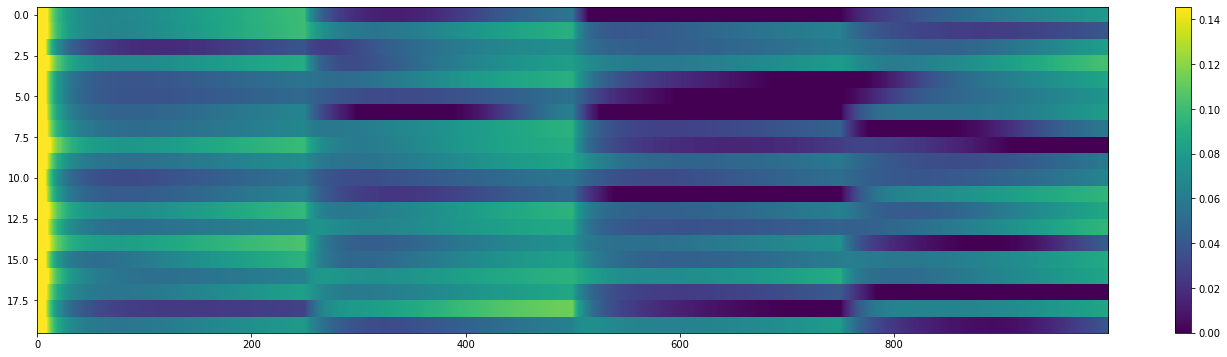

In [4]:
# Plotting
plt.figure(figsize=(24, 6))  # You can adjust the dimensions as needed
norm = Normalize(vmin=.3*np.min(p), vmax=.3*np.max(p))  # Normalize based on the min and max of p
plt.imshow(p, aspect='auto',norm=norm,interpolation='nearest')

plt.colorbar()
plt.show()

In [5]:
x

array([0.07910974, 0.03937384, 0.08182652, 0.1030486 , 0.08519425,
       0.07706592, 0.08120266, 0.05959333, 0.        , 0.05927378,
       0.06656406, 0.09561733, 0.08713994, 0.09582161, 0.04402776,
       0.08833663, 0.08579231, 0.        , 0.08585366, 0.03911553])